<a href="https://colab.research.google.com/github/reeniecd/DSC510-T301/blob/master/Assignement_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM Text Generator

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

## Source Data

In [4]:
## Download from https://www.gutenberg.org/ebooks/66447 and save to local 

from google.colab import files
uploaded = files.upload()

Saving Aab.txt to Aab.txt


In [5]:
file = open("Aab.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of The Aab, by Edward W. Ludwig This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBoo'

In [6]:
len(data)

33740

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 9, 7, 66, 2, 1, 24, 23, 272, 273, 274, 16, 66, 35, 20]

In [8]:
len(sequence_data)

5831

In [9]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1484


In [10]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  5828


array([[  1,   9,   7,  66],
       [  9,   7,  66,   2],
       [  7,  66,   2,   1],
       [ 66,   2,   1,  24],
       [  2,   1,  24,  23],
       [  1,  24,  23, 272],
       [ 24,  23, 272, 273],
       [ 23, 272, 273, 274],
       [272, 273, 274,  16],
       [273, 274,  16,  66]])

In [11]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [12]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  1   9   7]
 [  9   7  66]
 [  7  66   2]
 [ 66   2   1]
 [  2   1  24]
 [  1  24  23]
 [ 24  23 272]
 [ 23 272 273]
 [272 273 274]
 [273 274  16]]
Response:  [ 66   2   1  24  23 272 273 274  16  66]


In [13]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the model

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             14840     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 1484)              1485484   
                                                                 
Total params: 14,549,324
Trainable params: 14,549,324
Non-trainable params: 0
_________________________________________________________________


### Plot the model

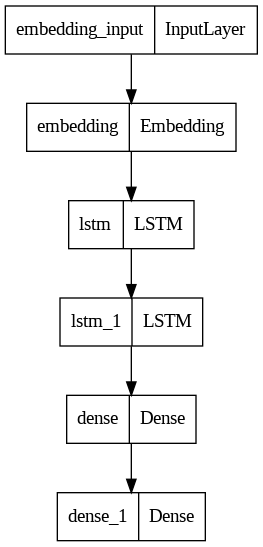

In [16]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### Train the model

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
92/92 [==============================] - ETA: 0s - loss: 6.5470
Epoch 1: loss improved from inf to 6.54700, saving model to next_words.h5
92/92 [==============================] - 64s 637ms/step - loss: 6.5470
Epoch 2/70
92/92 [==============================] - ETA: 0s - loss: 6.1198
Epoch 2: loss improved from 6.54700 to 6.11977, saving model to next_words.h5
92/92 [==============================] - 58s 635ms/step - loss: 6.1198
Epoch 3/70
92/92 [==============================] - ETA: 0s - loss: 6.0440
Epoch 3: loss improved from 6.11977 to 6.04403, saving model to next_words.h5
92/92 [==============================] - 62s 671ms/step - loss: 6.0440
Epoch 4/70
92/92 [==============================] - ETA: 0s - loss: 5.9609
Epoch 4: loss improved from 6.04403 to 5.96089, saving model to next_words.h5
92/92 [==============================] - 57s 619ms/step - loss: 5.9609
Epoch 5/70
92/92 [==============================] - ETA: 0s - loss: 5.7275
Epoch 5: loss improved from 5.960

### Predict

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

results_dir = 'dsc650/assignments/assignment11/results'

for _ in range(20):
    text = input("Enter your line: ")
  
    try:
        text = text.split(" ")
        text = text[-3:]
        print(text)
      
        predicted_word = Predict_Next_Words(model, tokenizer, text)
        
        # Append the predicted word to the results directory
        with open(os.path.join(results_dir, 'predictions.txt'), 'a') as f:
            f.write(predicted_word + '\n')

    except Exception as e:
        print("Error occurred:", e)
        continue